## Cargamos el dataset

In [95]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
#Cargamos dataset a utilizar
df_entrada = pd.read_csv("../data/ds_gasto_5.csv", sep=";", encoding='latin1')

### Calculo de nro_ejecutoras_x_proyecto_x_anio


In [131]:
# 1. Obtener combinaciones únicas de anio, proyecto y ejecutora
a = df_entrada[['ANIO', 'PROYECTO', 'EJECUTORA']].drop_duplicates()

In [132]:
# 2. Agrupar por anio y proyecto, y contar el número de ejecutoras
result = a.groupby(['ANIO', 'PROYECTO']).size().reset_index(name='NRO_EJECUTORAS')

In [135]:
duplicados = result.duplicated(subset=['ANIO', 'PROYECTO'], keep=False)
result[duplicados]


In [137]:
df_entrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627803 entries, 0 to 627802
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ANIO                              627803 non-null  int64  
 1   NIVEL                             627803 non-null  int64  
 2   NIVEL_GOBIERNO                    627803 non-null  object 
 3   DPTO                              627803 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE     627803 non-null  object 
 5   FUNCION                           627803 non-null  int64  
 6   FUNCION_NOMBRE                    627803 non-null  object 
 7   PIA                               627803 non-null  int64  
 8   PIM                               627803 non-null  int64  
 9   DEVENGADO                         627803 non-null  float64
 10  IP                                627803 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL          627803 non-null  i

#### LEFT JOIN

In [140]:
# Realizar la unión (merge) de df_entrada con result
df_final = pd.merge(df_entrada, result[['ANIO', 'PROYECTO', 'NRO_EJECUTORAS']],
                    on=['ANIO', 'PROYECTO'], how='left')

# Renombrar la columna 'nro_ejecutoras' a 'NRO_EJECUTORAS_X_PROYECTO_X_ANIO'
df_final = df_final.rename(columns={'NRO_EJECUTORAS': 'NRO_EJECUTORAS_X_PROYECTO_X_ANIO'})


In [141]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627803 entries, 0 to 627802
Data columns (total 37 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ANIO                              627803 non-null  int64  
 1   NIVEL                             627803 non-null  int64  
 2   NIVEL_GOBIERNO                    627803 non-null  object 
 3   DPTO                              627803 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE     627803 non-null  object 
 5   FUNCION                           627803 non-null  int64  
 6   FUNCION_NOMBRE                    627803 non-null  object 
 7   PIA                               627803 non-null  int64  
 8   PIM                               627803 non-null  int64  
 9   DEVENGADO                         627803 non-null  float64
 10  IP                                627803 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL          627803 non-null  i

### Filtrar nivel == 'E'

In [182]:
df_entrada[['NIVEL','NIVEL_GOBIERNO']].value_counts()

NIVEL  NIVEL_GOBIERNO
3      M                 507958
2      R                  63866
1      E                  55979
Name: count, dtype: int64

In [185]:
#df_filtro_x_nivel = df_final.query('NIVEL_GOBIERNO == "E"')
df_filtro_x_nivel = df_entrada.query('NIVEL_GOBIERNO == "E"')

In [186]:
df_filtro_x_nivel.MODALIDAD_EJECUCION.value_counts()

MODALIDAD_EJECUCION
INDIRECTA          22708
SIN_INFORMACION    21463
MIXTA               8178
DIRECTA             3630
Name: count, dtype: int64

### NULL values -> costo_actualizado, monto_viable

In [190]:
df_filtro_x_nivel.isnull().sum()  

ANIO                                   0
NIVEL                                  0
NIVEL_GOBIERNO                         0
DPTO                                   0
DEPARTAMENTO_EJECUTORA_NOMBRE          0
FUNCION                                0
FUNCION_NOMBRE                         0
PIA                                    0
PIM                                    0
DEVENGADO                              0
IP                                     0
CAMBIO_GOBIERNO_NACIONAL               0
NRO_PRESIDENTES_X_ANO                  0
FENOMENO_NINO                          0
PANDEMIA                               0
CAMBIO_GOBIERNO_REGIONAL_LOCAL         0
ELECCION_REGIONAL_LOCAL                0
TIPO_GOBIERNO_NACIONAL                 0
NRO_CONFLICTO_SOCIAL_X_ANO             0
INFLACION_ANUAL                        0
PROYECTO                               0
EJECUTORA                              0
PROYECTO_EDAD_NETA                     0
PROYECTO_EDAD_BRUTA                    0
IGEIP_EJECUCION 

In [273]:
df_entrada_cleaned = df_filtro_x_nivel.dropna(subset=['MONTO_VIABLE'])

In [277]:
df_entrada_cleaned.isnull().sum()

ANIO                                0
NIVEL                               0
NIVEL_GOBIERNO                      0
DPTO                                0
DEPARTAMENTO_EJECUTORA_NOMBRE       0
FUNCION                             0
FUNCION_NOMBRE                      0
PIA                                 0
PIM                                 0
DEVENGADO                           0
IP                                  0
CAMBIO_GOBIERNO_NACIONAL            0
NRO_PRESIDENTES_X_ANO               0
FENOMENO_NINO                       0
PANDEMIA                            0
CAMBIO_GOBIERNO_REGIONAL_LOCAL      0
ELECCION_REGIONAL_LOCAL             0
TIPO_GOBIERNO_NACIONAL              0
NRO_CONFLICTO_SOCIAL_X_ANO          0
INFLACION_ANUAL                     0
PROYECTO                            0
EJECUTORA                           0
PROYECTO_EDAD_NETA                  0
PROYECTO_EDAD_BRUTA                 0
IGEIP_EJECUCION                     0
P_INCO_AVG                          0
NEJE_PUNTAJE

## EXPLORACION

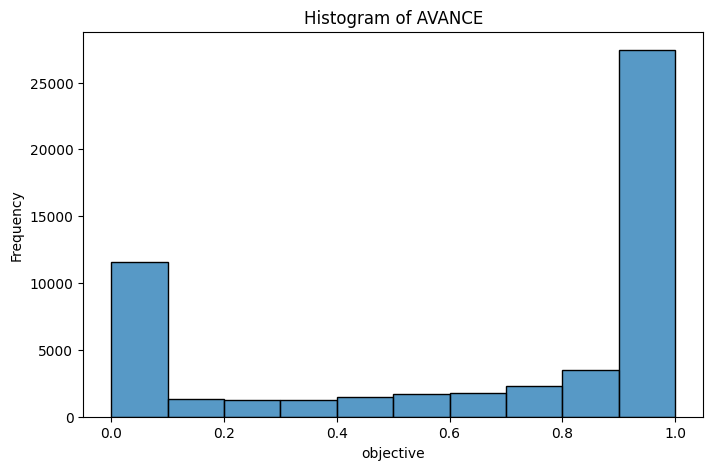

In [301]:
# Create a histogram for objective
plt.figure(figsize=(8, 5))
sns.histplot(df_entrada_cleaned['AVANCE'], bins=10, kde=False)
plt.xlabel('objective')
plt.ylabel('Frequency')
plt.title('Histogram of AVANCE')
plt.show()

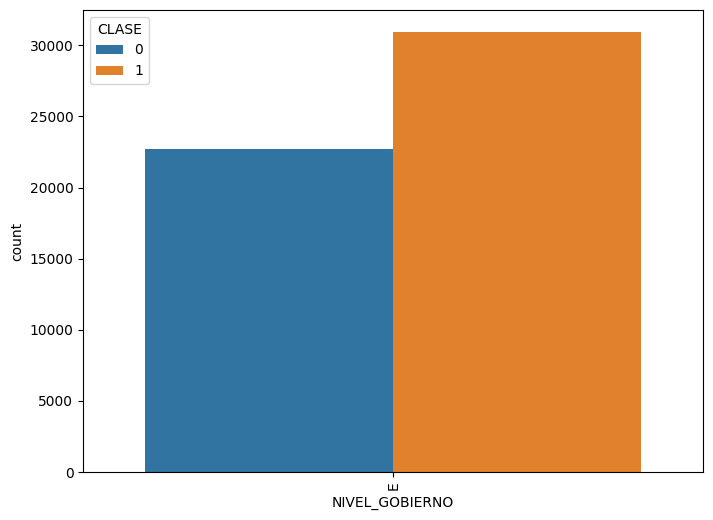

In [276]:
fig, ax = plt.subplots(figsize=(8, 6))  # Aumentamos el ancho para estirar horizontalmente
sns.countplot(
    data=df_entrada_cleaned,
    x='NIVEL_GOBIERNO',
    hue='CLASE',
    #palette=sns.color_palette("tab10"),
    ax=ax
)
# Rotamos las etiquetas del eje x verticalmente
plt.xticks(rotation=90, ha='center')
# Ajustamos el diseño para que las etiquetas no se corten
#plt.tight_layout()
# Mostramos el gráfico
plt.show()

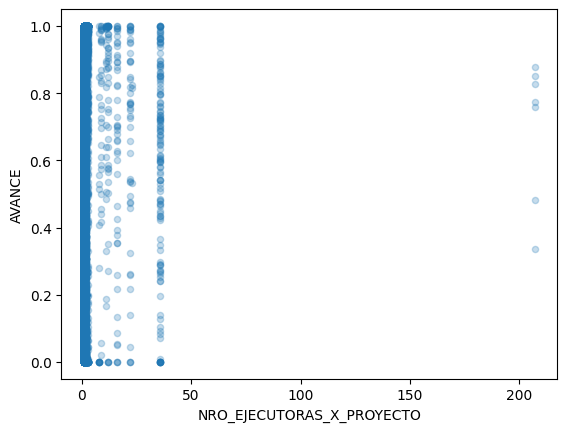

In [253]:
df_entrada_mayor_2021=df_entrada_cleaned.query('ANIO == 2019')
df_entrada_cleaned.plot.scatter(x="NRO_EJECUTORAS_X_PROYECTO", y="AVANCE", alpha=0.25)
#df_entrada.plot.scatter(x="PUNTAJE_INCO_EJECUTORA", y="AVANCE", alpha=0.1)
plt.show()
#IGEIP_EJECUCION
#NEJE_PUNTAJEIRI
#NRO_EJECUTORAS_X_PROYECTO
#P_INCO_AVG


# PREPARACION DE LOS DATOS

## DROP

In [278]:
df_entrada_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53674 entries, 70389 to 627802
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ANIO                              53674 non-null  int64  
 1   NIVEL                             53674 non-null  int64  
 2   NIVEL_GOBIERNO                    53674 non-null  object 
 3   DPTO                              53674 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE     53674 non-null  object 
 5   FUNCION                           53674 non-null  int64  
 6   FUNCION_NOMBRE                    53674 non-null  object 
 7   PIA                               53674 non-null  int64  
 8   PIM                               53674 non-null  int64  
 9   DEVENGADO                         53674 non-null  float64
 10  IP                                53674 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL          53674 non-null  int64  
 12  NRO_

In [279]:
col_to_drop = [ 'ANIO'
            ,'NIVEL_GOBIERNO'
            ,'DEPARTAMENTO_EJECUTORA_NOMBRE'
            ,'FUNCION_NOMBRE'
            ,'PIA'
            ,'DEVENGADO'
            ,'PROYECTO'
            ,'EJECUTORA'
            ,'AVANCE' 
            #,'CLASE'
            ,'FENOMENO_NINO' # IG muy bajo
            ,'CAMBIO_GOBIERNO_NACIONAL' # IG muy bajo
            ,'P_INCO_AVG' # Incluido en PUNTAJE_INCO_EJECUTORA
            ,'NEJE_PUNTAJEIRI' # Incluido en NPRY_PUNTAJEIRI
            #,'NRO_EJECUTORAS_X_PROYECTO' # Incluido en NRO_EJECUTORAS_X_PROYECTO_ANIO
            ]
               
df_entrada_drop = df_entrada_cleaned.drop(col_to_drop, axis='columns', inplace=False)

In [280]:
df_entrada_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53674 entries, 70389 to 627802
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NIVEL                             53674 non-null  int64  
 1   DPTO                              53674 non-null  int64  
 2   FUNCION                           53674 non-null  int64  
 3   PIM                               53674 non-null  int64  
 4   IP                                53674 non-null  float64
 5   NRO_PRESIDENTES_X_ANO             53674 non-null  int64  
 6   PANDEMIA                          53674 non-null  int64  
 7   CAMBIO_GOBIERNO_REGIONAL_LOCAL    53674 non-null  int64  
 8   ELECCION_REGIONAL_LOCAL           53674 non-null  int64  
 9   TIPO_GOBIERNO_NACIONAL            53674 non-null  object 
 10  NRO_CONFLICTO_SOCIAL_X_ANO        53674 non-null  int64  
 11  INFLACION_ANUAL                   53674 non-null  float64
 12  PROY

## ONE HOT

In [282]:
# Aplicar one-hot encoding a 'columna1'
columns_to_one_hot_encode = [#'NIVEL',
                              'TIPO_GOBIERNO_NACIONAL'
                             , 'DPTO'
                             , 'FUNCION'
                             , 'MODALIDAD_EJECUCION']
df_one_hot = pd.get_dummies(df_entrada_drop, columns=columns_to_one_hot_encode, dtype=int)

In [283]:
(
    df_one_hot.rename(columns={'TIPO_GOBIERNO_NACIONAL_Centro derecha': 'tgn_centro_derecha',
                                'TIPO_GOBIERNO_NACIONAL_Centro izquierda': 'tgn_centro_izquierda',
                                'TIPO_GOBIERNO_NACIONAL_Izquierda': 'tgn_izquierda',
                                        }, inplace=True)
)

In [284]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53674 entries, 70389 to 627802
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   NIVEL                                53674 non-null  int64  
 1   PIM                                  53674 non-null  int64  
 2   IP                                   53674 non-null  float64
 3   NRO_PRESIDENTES_X_ANO                53674 non-null  int64  
 4   PANDEMIA                             53674 non-null  int64  
 5   CAMBIO_GOBIERNO_REGIONAL_LOCAL       53674 non-null  int64  
 6   ELECCION_REGIONAL_LOCAL              53674 non-null  int64  
 7   NRO_CONFLICTO_SOCIAL_X_ANO           53674 non-null  int64  
 8   INFLACION_ANUAL                      53674 non-null  float64
 9   PROYECTO_EDAD_NETA                   53674 non-null  int64  
 10  PROYECTO_EDAD_BRUTA                  53674 non-null  int64  
 11  IGEIP_EJECUCION             

In [285]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53674 entries, 70389 to 627802
Data columns (total 73 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   NIVEL                                53674 non-null  int64  
 1   PIM                                  53674 non-null  int64  
 2   IP                                   53674 non-null  float64
 3   NRO_PRESIDENTES_X_ANO                53674 non-null  int64  
 4   PANDEMIA                             53674 non-null  int64  
 5   CAMBIO_GOBIERNO_REGIONAL_LOCAL       53674 non-null  int64  
 6   ELECCION_REGIONAL_LOCAL              53674 non-null  int64  
 7   NRO_CONFLICTO_SOCIAL_X_ANO           53674 non-null  int64  
 8   INFLACION_ANUAL                      53674 non-null  float64
 9   PROYECTO_EDAD_NETA                   53674 non-null  int64  
 10  PROYECTO_EDAD_BRUTA                  53674 non-null  int64  
 11  IGEIP_EJECUCION             

## X e y

In [286]:
X = df_one_hot.drop(['CLASE'], axis=1)
y = df_one_hot['CLASE'].values

## Split train and test

In [287]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42)

# MODELING

### RANDOM FOREST

In [289]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from time import time
# 2. Función para entrenar y evaluar modelos
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time
    
    start_time = time()
    y_pred = model.predict(X_test)
    predict_time = time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Prediction time: {predict_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [290]:
from sklearn.ensemble import RandomForestClassifier

# 4. Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, X_train, X_test, y_train, y_test)


Training Random Forest model...
Accuracy: 0.8035
Training time: 4.47 seconds
Prediction time: 0.27 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      6838
           1       0.82      0.84      0.83      9265

    accuracy                           0.80     16103
   macro avg       0.80      0.80      0.80     16103
weighted avg       0.80      0.80      0.80     16103


Confusion Matrix:
[[5123 1715]
 [1450 7815]]


In [302]:

# 5. Optimización de hiperparámetros para Random Forest
print("\nOptimizing Random Forest hyperparameters...")
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

print("Best parameters:", rf_random.best_params_)
print("\nEvaluating optimized Random Forest model...")
train_and_evaluate(rf_random.best_estimator_, X_train, X_test, y_train, y_test)


Optimizing Random Forest hyperparameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

Evaluating optimized Random Forest model...
Accuracy: 0.8016
Training time: 22.84 seconds
Prediction time: 1.17 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      6838
           1       0.82      0.84      0.83      9265

    accuracy                           0.80     16103
   macro avg       0.80      0.79      0.80     16103
weighted avg       0.80      0.80      0.80     16103


Confusion Matrix:
[[5114 1724]
 [1471 7794]]


# StandardScaler

## RobustScaler

In [292]:
from sklearn.preprocessing import RobustScaler

In [293]:
# Crear el objeto RobustScaler
scaler = RobustScaler()

# Ajustar el scaler a los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

In [294]:
# Convertir los resultados a DataFrames si es necesario
X_train_rs = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_rs = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### LogisticRegression

In [303]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train_scaled, y_train)

c:\ws\scm\github\mia\MIA104\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [305]:
from sklearn.metrics import accuracy_score
prediction_test = model.predict(X_test_scaled)
print(accuracy_score(y_test, prediction_test))

0.6424268769794448


### RandomForest

In [297]:
from sklearn.ensemble import RandomForestClassifier

# 4. Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, X_train_scaled, X_test_scaled, y_train, y_test)


Training Random Forest model...
Accuracy: 0.7988
Training time: 1.07 seconds
Prediction time: 0.09 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      6838
           1       0.82      0.84      0.83      9265

    accuracy                           0.80     16103
   macro avg       0.79      0.79      0.79     16103
weighted avg       0.80      0.80      0.80     16103


Confusion Matrix:
[[5114 1724]
 [1516 7749]]


In [298]:
feature_importances = rf_model.feature_importances_

importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})  

importances_df = importances_df.sort_values('importance', ascending=False)

In [299]:
importances_df.head(20)

,feature,importance
1,PIM,0.133832
15,MONTO_VIABLE,0.117284
16,COSTO_ACTUALIZADO,0.116976
13,NPRY_PUNTAJEIRI,0.088913
17,NRO_PROYECTOS_X_EJECUTORA_X_ANIO,0.073828
14,PUNTAJE_INCO_EJECUTORA,0.057397
10,PROYECTO_EDAD_BRUTA,0.057170
9,PROYECTO_EDAD_NETA,0.055679
2,IP,0.031701
8,INFLACION_ANUAL,0.024229


#### Optimización

In [300]:
# 5. Optimización de hiperparámetros para Random Forest
print("\nOptimizing Random Forest hyperparameters...")
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train_scaled, y_train)

print("Best parameters:", rf_random.best_params_)
print("\nEvaluating optimized Random Forest model...")
train_and_evaluate(rf_random.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)


Optimizing Random Forest hyperparameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

Evaluating optimized Random Forest model...
Accuracy: 0.8024
Training time: 16.71 seconds
Prediction time: 0.89 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      6838
           1       0.82      0.84      0.83      9265

    accuracy                           0.80     16103
   macro avg       0.80      0.80      0.80     16103
weighted avg       0.80      0.80      0.80     16103


Confusion Matrix:
[[5115 1723]
 [1459 7806]]
